In [2]:
import os
import pandas as pd

In [3]:
path = "./Sales_Data"       
files = [ file for file in os.listdir(path) if not file.startswith(".")]

df_all = pd.DataFrame()

for file in files:
   temp = pd.read_csv(path + "/" + file) 
   df_all =  pd.concat([df_all,temp])
    

df_all.to_csv("all_sales_data.csv", index=False)   
df = pd.read_csv("all_sales_data.csv")

df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"


**Drop rows of NaN**

In [3]:
df_nan = df[df.isna().any(axis = 1)]
display(df_nan[:2])                             # df.isnull()[:2]

df = df.dropna(how="all")
df.shape

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
339,NaN,NaN,NaN,NaN,NaN,NaN
630,NaN,NaN,NaN,NaN,NaN,NaN


(186305, 6)

**do more filtetering**

In [4]:
df2 = df[df['Order Date'].str[0:2]=='Or']
df2[:2]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
158,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
990,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [5]:
df = df[df['Order Date'].str[0:2]!='Or']
df.shape

(185950, 6)

**Covert data type to numeric type**

In [6]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

**Augment data**

In [7]:
df["Month"] = df["Order Date"].str[0:2].astype("int32")
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [8]:
df["Month2"] = pd.to_datetime( df["Order Date"]).dt.month   # takes a lot of time 
df[:2]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month2
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,6
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,6


**Add city and state**

In [9]:
def get_city(x):
    return x.split(",")[1]

def get_state(x):
    return x.split(",")[2].split(" ")[1]

df["city"] = df["Purchase Address"].apply( lambda x : f"{get_city(x)} ({get_state(x)})")

df[:2]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month2,city
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,6,Portland (ME)
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,6,San Francisco (CA)


In [10]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month2,city
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,6,Portland (ME)
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,6,San Francisco (CA)
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,6,Los Angeles (CA)
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,6,Seattle (WA)
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,6,San Francisco (CA)
...,...,...,...,...,...,...,...,...,...
186845,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",3,3,San Francisco (CA)
186846,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",3,3,San Francisco (CA)
186847,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",3,3,Los Angeles (CA)
186848,176557,iPhone,1,700.00,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",3,3,San Francisco (CA)


### Data Exploration

**Question 1: What was the best month for sales? How much was earned that month?**

In [11]:
df["Sales"] = df["Quantity Ordered"].astype("int")*df["Price Each"].astype("float")

In [17]:
df.groupby(["Month"]).sum()

,Quantity Ordered,Price Each,Month2,Sales
Month,,,,
1,10903,1811768.38,9709,1822256.73
2,13449,2188884.72,23950,2202022.42
3,17005,2791207.83,45459,2807100.38
4,20558,3367671.02,73116,3390670.24
5,18667,3135125.13,82830,3152606.75
6,15253,2562025.61,81324,2577802.26
7,16072,2632539.56,100051,2647775.76
8,13448,2230345.42,95688,2244467.88
9,13109,2084992.09,104589,2097560.13


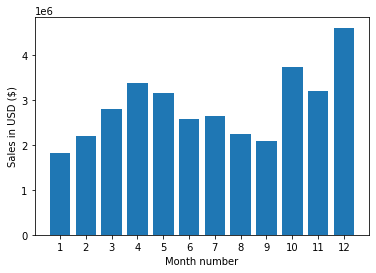

In [22]:
from  matplotlib import pyplot as plt

months = range(1,13)

plt.bar(months, df.groupby(["Month"]).sum()["Sales"])

plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

**Question 2: What city sold the most product?**

In [24]:
df.groupby("city").sum()

,Quantity Ordered,Price Each,Month,Month2,Sales
city,,,,,
Atlanta (GA),16602,2779908.20,104794,104794,2795498.58
Austin (TX),11153,1809873.61,69829,69829,1819581.75
Boston (MA),22528,3637409.77,141112,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,208325,5452570.80
New York City (NY),27932,4635370.83,175741,175741,4664317.43
Portland (ME),2750,447189.25,17144,17144,449758.27
Portland (OR),11303,1860558.22,70621,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,315520,8262203.91


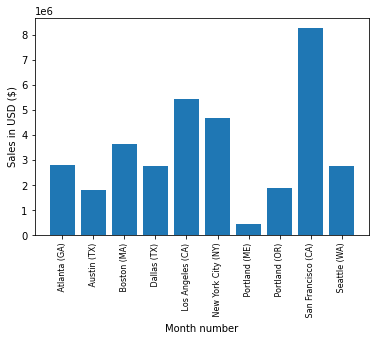

In [37]:
from  matplotlib import pyplot as plt

keys = [ city for city,df in df.groupby("city")]   # here df is entire dataframe . wierd!!
# keys = list(df["city"].unique())                 # will not be in order with Sales :hence cant be used here  


plt.bar(keys,df.groupby(['city']).sum()['Sales'])


plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [43]:
next(iter(df.groupby("city")))[1].shape

(14881, 10)

**select-rows-if-id-appear-several-time**

In [46]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df2 = df[df['Order ID'].duplicated(keep=False)]

df2[:2]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month2,city,Sales
17,209938,iPhone,1,700.00,06/15/19 12:29,"766 Meadow St, Seattle, WA 98101",6,6,Seattle (WA),700.00
18,209938,Wired Headphones,1,11.99,06/15/19 12:29,"766 Meadow St, Seattle, WA 98101",6,6,Seattle (WA),11.99


**concatenate-strings-from-several-rows-using-pandas-groupby**

In [47]:
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df2[['Order ID', 'Grouped']].drop_duplicates()
df2

/tmp/ipykernel_1772762/3100548195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
17,209938,"iPhone,Wired Headphones"
29,209949,"Google Phone,USB-C Charging Cable"
41,209960,"USB-C Charging Cable,AA Batteries (4-pack)"
43,209961,"iPhone,Lightning Charging Cable"
147,210064,"Lightning Charging Cable,27in FHD Monitor"
...,...,...
186771,176484,"iPhone,Wired Headphones"
186774,176486,"Bose SoundSport Headphones,Apple Airpods Headp..."
186776,176487,"iPhone,Lightning Charging Cable"
186827,176537,"Apple Airpods Headphones,Apple Airpods Headphones"


In [49]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

    
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
